In [1]:
print("Hello world")

Hello world


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import f1_score, accuracy_score


In [6]:
#read data in CSV format according to your PC's address
print("Reading the dataset")


Reading the dataset


In [7]:
data = pd.read_csv("spam.csv", encoding='latin')

In [8]:
data.rename(columns = {'v1':'Class', 'v2':'Text'}, inplace=True)
data['numClass'] = data['Class'].map({'ham':0, 'spam':1})
data['Count'] = 0
for i in np.arange(0, len(data.Text)):
    data.loc[i,'Count'] = len(data.loc[i,'Text'])

In [9]:
#Unique values in target set
print("Unique values in the Class set: ", data.Class.unique())

Unique values in the Class set:  ['ham' 'spam']


In [10]:
ham=data[data.numClass == 0]

In [11]:
ham_count = pd.DataFrame(pd.value_counts(ham['Count'],sort=True).sort_index())
print("Number of ham messages in data set :", ham['Class'].count())
print("Ham Count Value", ham_count['Count'].count())

Number of ham messages in data set : 4825
Ham Count Value 272


In [13]:
spam = data[data.numClass == 1]
spam_count = pd.DataFrame(pd.value_counts(spam['Count'],sort=True).sort_index())
print("Number of spam messages in data set: ", spam['Class'].count())
print("Spam Count value:", spam_count['Count'].count())

Number of spam messages in data set:  747
Spam Count value: 122


In [18]:
#Removing stopwords of  English
stopset = set(stopwords.words("english"))

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  Searched in:
    - '/home/nbuser/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
    - '/home/nbuser/anaconda3_501/nltk_data'
    - '/home/nbuser/anaconda3_501/share/nltk_data'
    - '/home/nbuser/anaconda3_501/lib/nltk_data'
**********************************************************************


In [19]:
import nltk

In [20]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /home/nbuser/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [21]:
#Removing stopwords of  English
stopset = set(stopwords.words("english"))

In [23]:
#Initializing Count Vectorizer
vectorizer = CountVectorizer(stop_words=stopset, binary=True)
vectorizer = CountVectorizer()

In [29]:
X = vectorizer.fit_transform(data.Text)





In [26]:
#Extract target column 'Class'
y = data.numClass

In [30]:
#Performing test train split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, train_size=0.7, random_state=None)



In [31]:
#Showing the results of the split
print("\n")
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))
print("\n")



Training set has 3900 samples.
Testing set has 1672 samples.




In [32]:
objects = ('Multi-NB', 'SVM', 'KNN', 'RF', 'AdaBoost')

In [33]:
def train_classifier(clf, X_train, y_train):
    clf.fit(X_train, y_train)

In [34]:
#Function to predict features
def predict_labels(clf, features):
    return(clf.predict(features))

In [35]:
#Initialize the 5 models
A = MultinomialNB(alpha=1.0, fit_prior=True)
B = LinearSVC()
C = KNeighborsClassifier(n_neighbors=1)
D = RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=None )
E = AdaBoostClassifier(n_estimators=100)


In [36]:
clf = [A,B,C,D,E]
acc_score  = [0,0,0,0,0]


In [38]:
for a in range(0,5):
    print(objects[a])
    train_classifier(clf[a], X_train, y_train)
    y_pred = predict_labels(clf[a], X_test)
    pred_val = f1_score(y_test, y_pred)
    acc_score[a] = accuracy_score(y_test, y_pred, normalize=True, sample_weight=None)
    print("Accuracy in %:")
    print(acc_score[a]*100)
    print("F1 Score")
    print(pred_val)
    print("\n")

Multi-NB
Accuracy in %:
98.08612440191388
F1 Score
0.9319148936170213


SVM
Accuracy in %:
98.14593301435407
F1 Score
0.9280742459396751


KNN
Accuracy in %:
95.69377990430623
F1 Score
0.8125000000000001


RF
Accuracy in %:
97.188995215311
F1 Score
0.8861985472154964


AdaBoost
Accuracy in %:
97.30861244019138
F1 Score
0.897025171624714




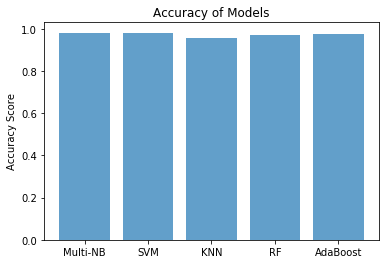

In [39]:
y_pos = np.arange(len(objects))
y_val = [x for x in acc_score]
plt.bar(y_pos, y_val, align='center', alpha=0.7)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy Score')
plt.title('Accuracy of Models')
plt.show()